**Ques 1**

[*********************100%%**********************]  1 of 1 completed


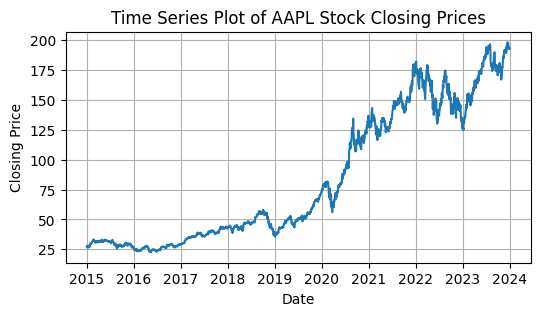

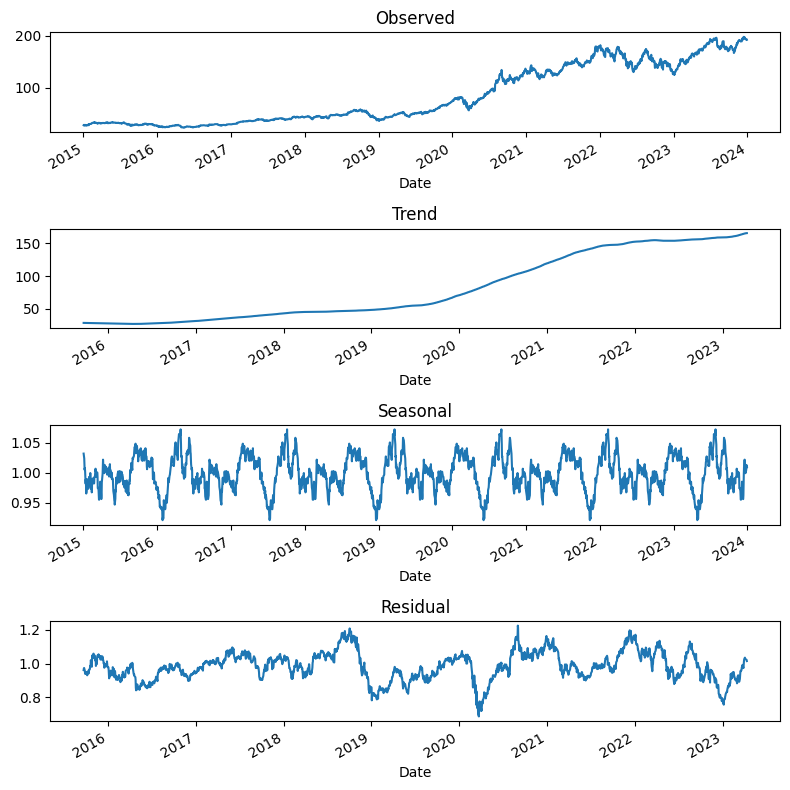

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

if len(data) < 730:
    raise ValueError(f"Not enough data points. Need at least 730, but got {len(data)}")

data.index = pd.to_datetime(data.index)

plt.figure(figsize=(6, 3))
plt.plot(data['Close'], linestyle='-')
plt.title(f'Time Series Plot of {ticker} Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

**Ques 2**

[*********************100%%**********************]  1 of 1 completed


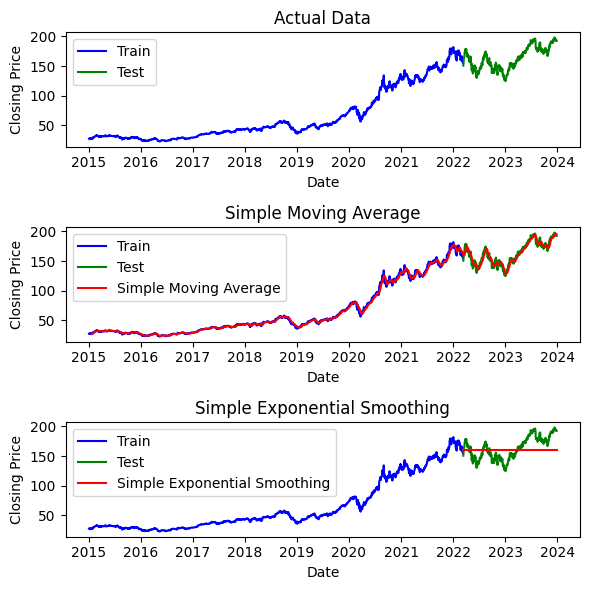

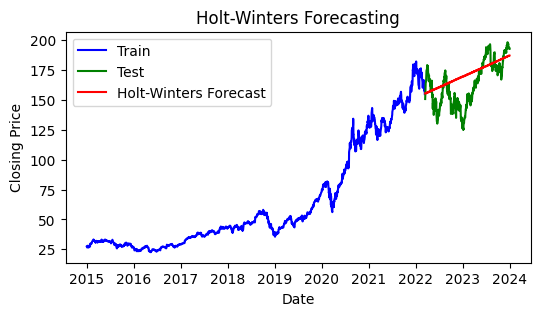

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import yfinance as yf

ticker = 'AAPL'
data1 = yf.download(ticker, start='2015-01-01', end='2023-12-31')

train_size = int(len(data1) * 0.8)
train, test = data1.iloc[:train_size], data1.iloc[train_size:]

plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.title('Actual Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

window_size = 12
data1['SMA'] = data1['Close'].rolling(window=window_size).mean()
plt.subplot(3, 1, 2)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(data1.index, data1['SMA'], label='Simple Moving Average', color='red')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

alpha = 0.2
model = SimpleExpSmoothing(train['Close']).fit(smoothing_level=alpha, optimized=False)
forecast_ses = model.forecast(len(test))
plt.subplot(3, 1, 3)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(test.index, forecast_ses, label='Simple Exponential Smoothing', color='red')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_hw = model.forecast(len(test))
plt.figure(figsize=(6, 3))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(test.index, forecast_hw, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Ques 3**

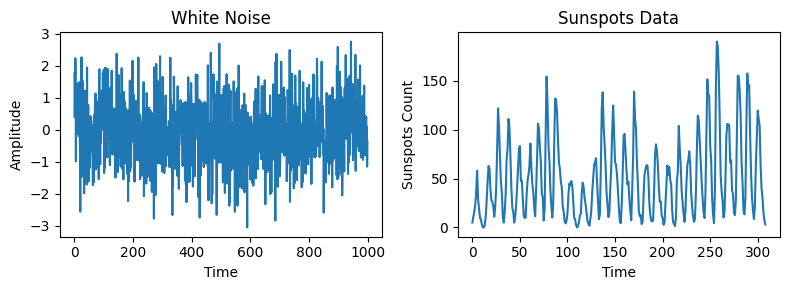

Augmented Dickey-Fuller Test for Sunspots Data:
ADF Statistic: -2.8377807249381943
p-value: 0.053076421728120673

Augmented Dickey-Fuller Test for White Noise:
ADF Statistic: -32.462559337689974
p-value: 0.0


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(0)
white_noise = np.random.normal(0, 1, 1000)
sunspots_data = sm.datasets.sunspots.load_pandas().data
sunspots = sunspots_data["SUNACTIVITY"]

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(sunspots)
plt.title('Sunspots Data')
plt.xlabel('Time')
plt.ylabel('Sunspots Count')
plt.tight_layout()
plt.show()

print("Augmented Dickey-Fuller Test for Sunspots Data:")
adf_result_sunspots = sm.tsa.stattools.adfuller(sunspots)
print(f"ADF Statistic: {adf_result_sunspots[0]}")
print(f"p-value: {adf_result_sunspots[1]}")

print("\nAugmented Dickey-Fuller Test for White Noise:")
adf_result_white_noise = sm.tsa.stattools.adfuller(white_noise)
print(f"ADF Statistic: {adf_result_white_noise[0]}")
print(f"p-value: {adf_result_white_noise[1]}")

**Ques 4**

Mean Absolute Error (MAE): 30.3803
Mean Squared Error (MSE): 1577.3521
Root Mean Squared Error (RMSE): 39.7159


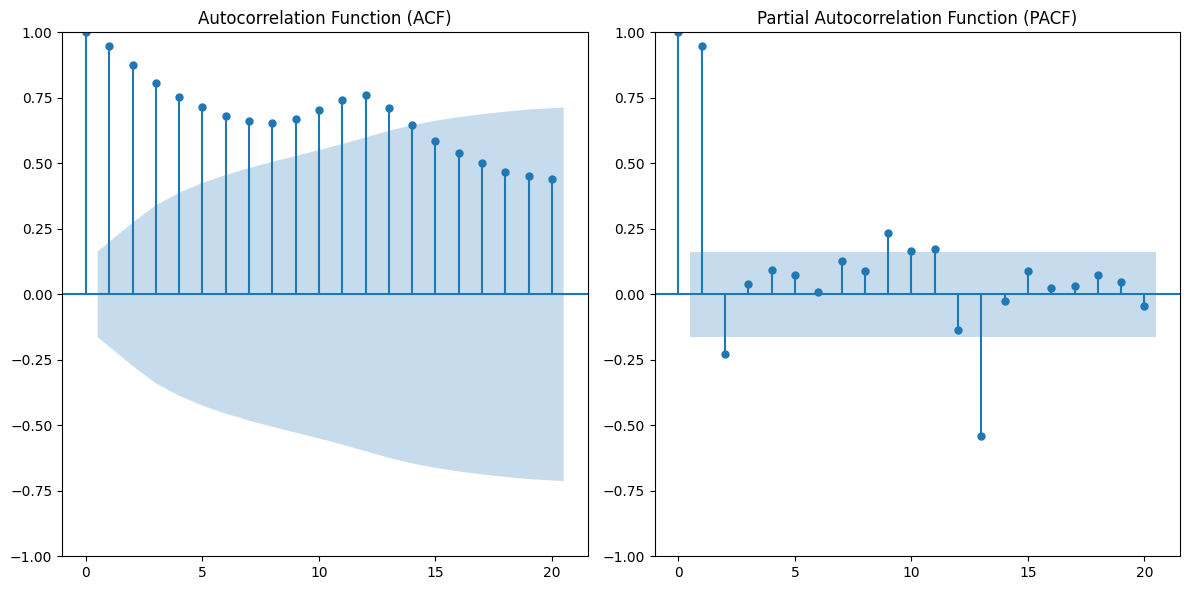

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv("airline-passengers.csv")
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

acf = sm.tsa.acf(data, nlags=20)
pacf = sm.tsa.pacf(data, nlags=20)

data_diff = data.diff().dropna()
data_diff_forecast = data_diff.shift(-1).dropna()
data_diff = data_diff.iloc[:-1]

mae = mean_absolute_error(data_diff, data_diff_forecast)
mse = mean_squared_error(data_diff, data_diff_forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(data, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

**Ques 5**


AR(1) Model Performance Metrics:
Mean Absolute Error (MAE): 25.6279
Mean Squared Error (MSE): 1107.3842
Root Mean Squared Error (RMSE): 33.2774

AR(2) Model Performance Metrics:
Mean Absolute Error (MAE): 24.6956
Mean Squared Error (MSE): 994.3745
Root Mean Squared Error (RMSE): 31.5337


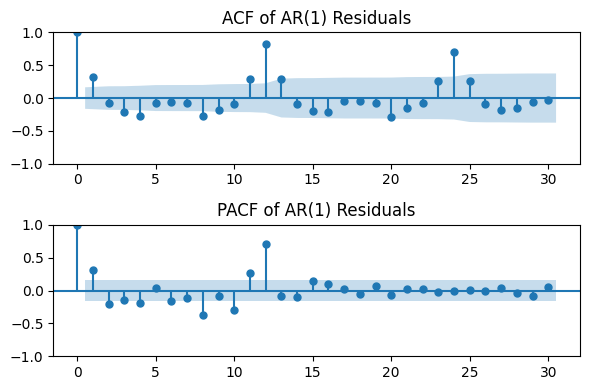

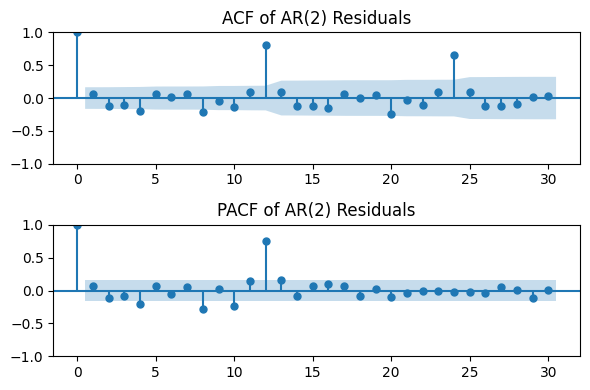

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

ar_model_1 = AutoReg(data, lags=1).fit()
ar_model_2 = AutoReg(data, lags=2).fit()

def calculate_metrics(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

forecast_1 = ar_model_1.fittedvalues
mae_1, mse_1, rmse_1 = calculate_metrics(forecast_1, data['Passengers'][1:])

forecast_2 = ar_model_2.fittedvalues
mae_2, mse_2, rmse_2 = calculate_metrics(forecast_2, data['Passengers'][2:])

print("\nAR(1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.4f}")

print("\nAR(2) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"Mean Squared Error (MSE): {mse_2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")

def plot_acf_pacf(residuals, model_order):
    plt.figure(figsize=(6, 4))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of AR({model_order}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of AR({model_order}) Residuals')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(ar_model_1.resid, 1)
plot_acf_pacf(ar_model_2.resid, 2)

**Ques 6**


MA(1) Model Performance Metrics:
Mean Absolute Error (MAE): 53.7171
Mean Squared Error (MSE): 4382.3622
Root Mean Squared Error (RMSE): 66.1994
R-squared (R2): 0.6934


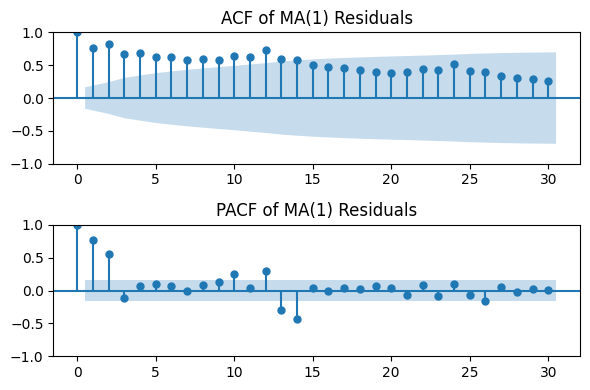


MA(2) Model Performance Metrics:
Mean Absolute Error (MAE): 38.2907
Mean Squared Error (MSE): 2275.9220
Root Mean Squared Error (RMSE): 47.7066
R-squared (R2): 0.8408


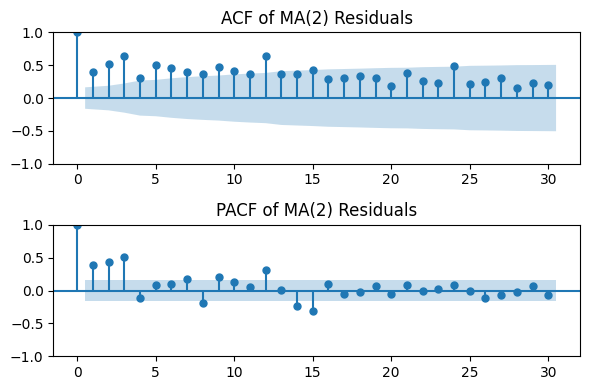

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

def evaluate_and_plot(ma_model_fit, lag):
    forecast = ma_model_fit.fittedvalues
    residuals = data['Passengers'] - forecast
    mae = mean_absolute_error(data['Passengers'], forecast)
    mse = mean_squared_error(data['Passengers'], forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(data['Passengers'], forecast)

    print(f"\nMA({lag}) Model Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    plt.figure(figsize=(6, 4))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of MA({lag}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of MA({lag}) Residuals')
    plt.tight_layout()
    plt.show()

ma_model_1 = ARIMA(data, order=(0, 0, 1))
ma_model_fit_1 = ma_model_1.fit()

ma_model_2 = ARIMA(data, order=(0, 0, 2))
ma_model_fit_2 = ma_model_2.fit()

evaluate_and_plot(ma_model_fit_1, 1)
evaluate_and_plot(ma_model_fit_2, 2)

**Ques 7**

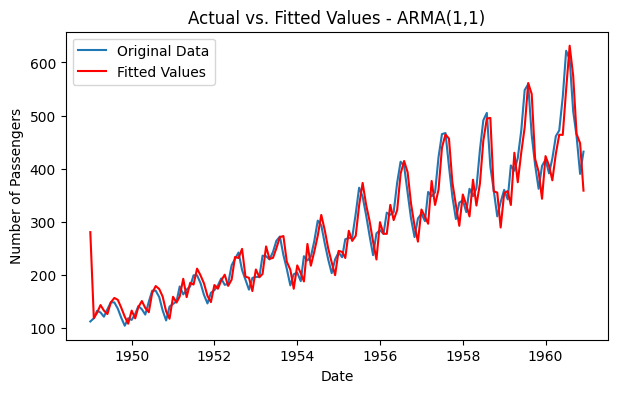

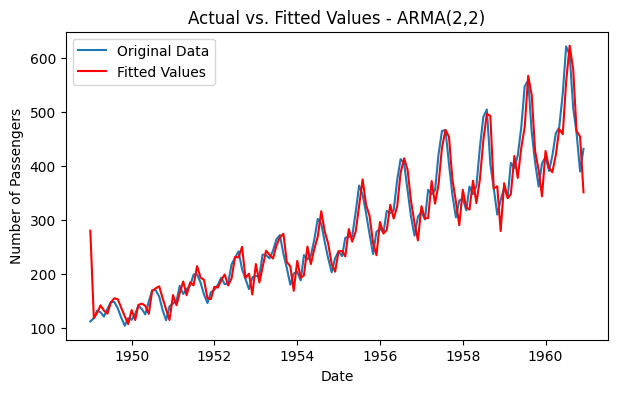

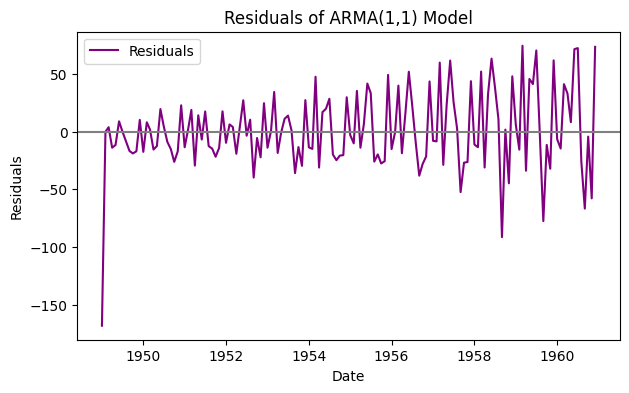

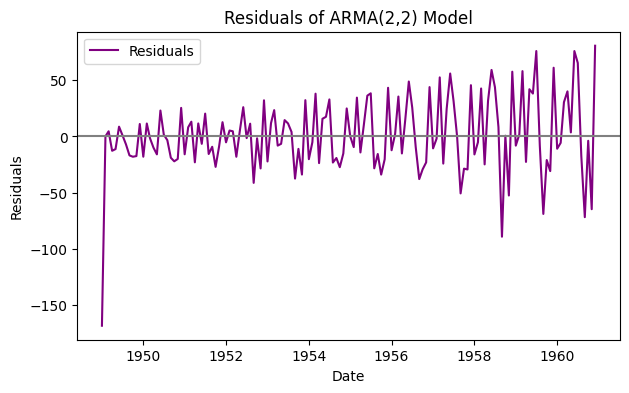

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

def fit_arma_model(data, order):
    model = ARIMA(data, order=order)
    result = model.fit()
    return result

def plot_actual_vs_fitted(data, result, model_name):
    plt.figure(figsize=(7, 4))
    plt.plot(data.index, data['Passengers'], label='Original Data')
    plt.plot(data.index, result.fittedvalues, color='red', label='Fitted Values')
    plt.title(f'Actual vs. Fitted Values - {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend()
    plt.show()

def plot_residuals(result, model_name):
    residuals = result.resid
    plt.figure(figsize=(7, 4))
    plt.plot(result.resid.index, residuals, label='Residuals', color='purple')
    plt.axhline(y=0, color='gray')
    plt.title(f'Residuals of {model_name} Model')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()


order_arma11 = (1, 0, 1)
result_arma11 = fit_arma_model(data['Passengers'], order_arma11)

order_arma22 = (2, 0, 2)
result_arma22 = fit_arma_model(data['Passengers'], order_arma22)

plot_actual_vs_fitted(data, result_arma11, 'ARMA(1,1)')
plot_actual_vs_fitted(data, result_arma22, 'ARMA(2,2)')

plot_residuals(result_arma11, 'ARMA(1,1)')
plot_residuals(result_arma22, 'ARMA(2,2)')

**Ques 8**

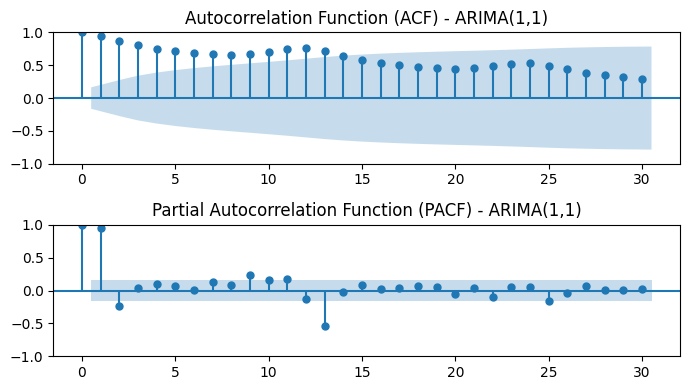


ARIMA(1,1) Model Performance Metrics:
Mean Absolute Error (MAE): 25.4254
Mean Squared Error (MSE): 1109.2751
Root Mean Squared Error (RMSE): 33.3058


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plot_acf(data, lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF) - ARIMA(1,1)')
plt.subplot(2, 1, 2)
plot_pacf(data, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) - ARIMA(1,1)')
plt.tight_layout()
plt.show()

arima_model = ARIMA(data, order=(1, 1, 0))
arima_model_fit = arima_model.fit()
arima_coefficients = arima_model_fit.params

arima_forecast = arima_model_fit.fittedvalues
arima_mae = mean_absolute_error(data['Passengers'], arima_forecast)
arima_mse = mean_squared_error(data['Passengers'], arima_forecast)
arima_rmse = np.sqrt(arima_mse)

print(f"\nARIMA(1,1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {arima_mae:.4f}")
print(f"Mean Squared Error (MSE): {arima_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse:.4f}")

**Ques 9**

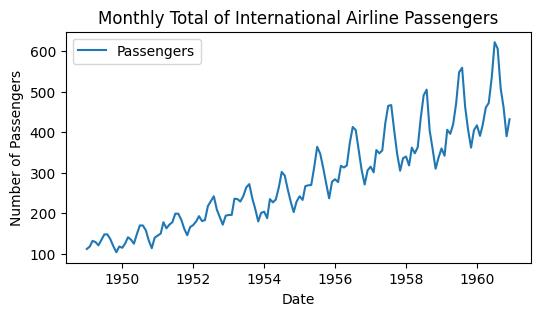

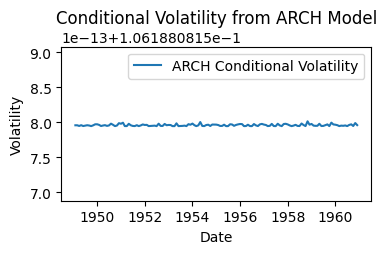

<Figure size 400x200 with 0 Axes>

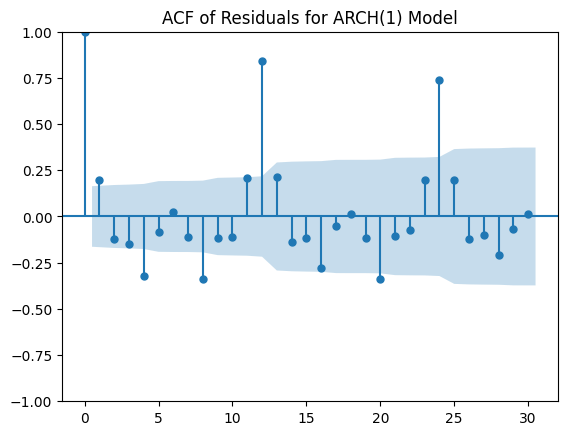

Evaluation Metrics for ARCH(1): MAE=0.115810, MSE=0.020635, RMSE=0.143649


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(6, 3))
plt.plot(data, label='Passengers')
plt.title('Monthly Total of International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

data['Log_Returns'] = np.log(data['Passengers']).diff()
returns = data['Log_Returns'].dropna()

arch_model = arch_model(returns, vol='ARCH', p=2)
arch_fit = arch_model.fit(disp='off')
params_1 = arch_fit.params

plt.figure(figsize=(4, 2))
plt.plot(arch_fit.conditional_volatility, label='ARCH Conditional Volatility')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

plt.figure(figsize=(4, 2))
plot_acf(arch_fit.resid, lags=30)
plt.title('ACF of Residuals for ARCH(1) Model')
plt.show()

mae = mean_absolute_error(returns, arch_fit.conditional_volatility)
mse = mean_squared_error(returns, arch_fit.conditional_volatility)
rmse = np.sqrt(mse)

print(f"Evaluation Metrics for ARCH(1): MAE={mae:.6f}, MSE={mse:.6f}, RMSE={rmse:.6f}")

In [3]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.8 MB/s eta 0:00:00


**Ques 10**

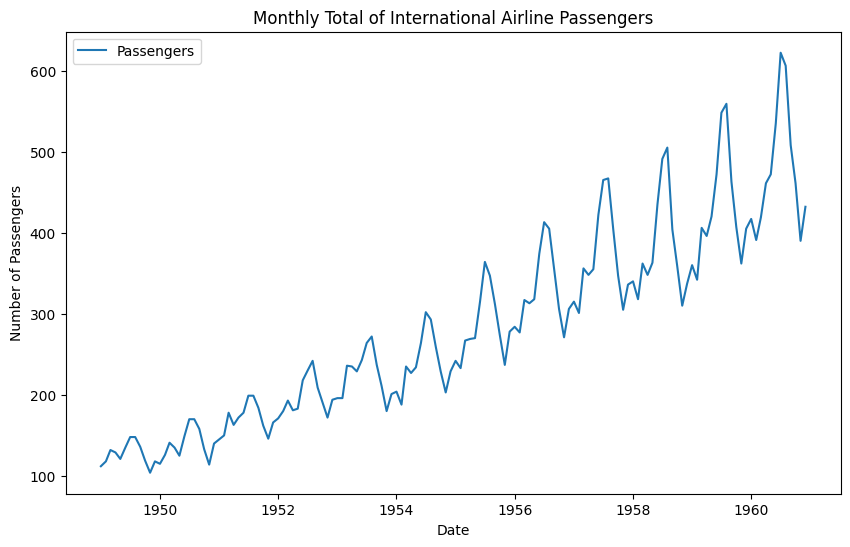


GARCH(1,1) Model Performance Metrics:
Mean Absolute Error (MAE): 168.6277
Mean Squared Error (MSE): 32505.4332
Root Mean Squared Error (RMSE): 180.2926


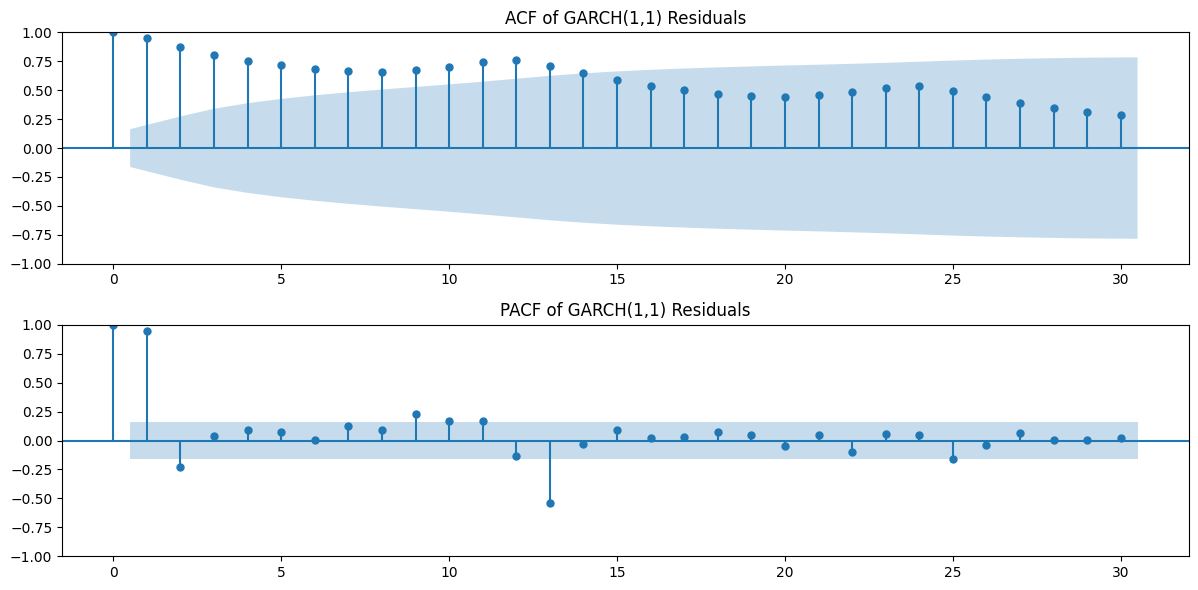

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Passengers')
plt.title('Monthly Total of International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

garch_model_1_1 = arch_model(data['Passengers'], vol='Garch', p=1, q=1).fit(disp='off')

def calculate_metrics(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

forecast_1_1 = garch_model_1_1.conditional_volatility
mae_1_1, mse_1_1, rmse_1_1 = calculate_metrics(forecast_1_1, data['Passengers'])

print("\nGARCH(1,1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_1_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_1_1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1_1:.4f}")

def plot_acf_pacf(residuals, model_order):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of GARCH({model_order[0]},{model_order[1]}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of GARCH({model_order[0]},{model_order[1]}) Residuals')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(garch_model_1_1.resid, (1, 1))